In [ ]:
# installare (se necessario) e importare GeoPandas
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip
piste = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip')


In [ ]:
# visualizzaere il geodataset delel piste ciclabili
piste

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (9.18700 45.48095, 9.18696 45.48085..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (9.24192 45.43931, 9.24202 45.43939..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (9.23979 45.43996, 9.23991 45.43998..."
3,9004,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,6.0,"LINESTRING (9.23902 45.44251, 9.23898 45.44256)"
4,9005,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,28.0,"LINESTRING (9.23990 45.43999, 9.23985 45.44009..."
...,...,...,...,...,...,...,...,...,...,...,...
3160,12932,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,4.0,"LINESTRING (9.14977 45.46021, 9.14979 45.46024)"
3161,12933,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,10.0,"LINESTRING (9.14966 45.46050, 9.14972 45.46057)"
3162,12934,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,5.0,"LINESTRING (9.14963 45.46046, 9.14966 45.46050)"
3163,12935,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,9.0,"LINESTRING (9.14957 45.46039, 9.14963 45.46046)"


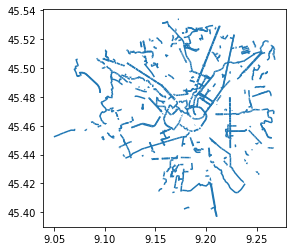

In [ ]:
piste.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip')


In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 1.1 MB/s 


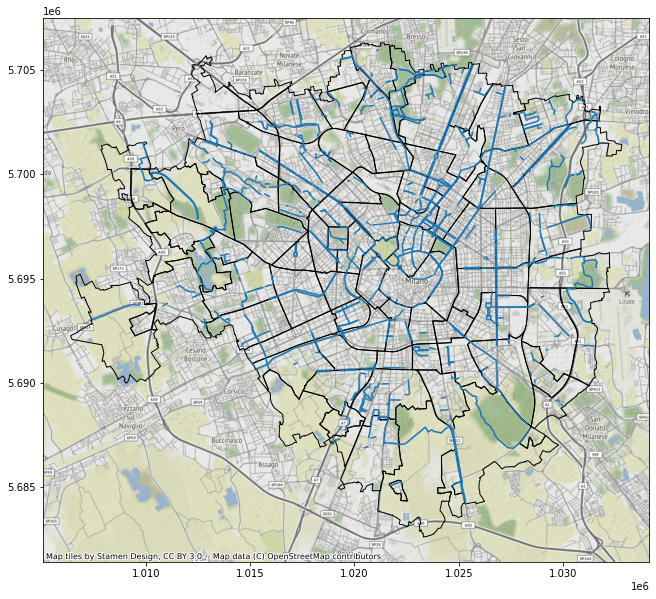

In [ ]:
ax = piste.to_crs(epsg=3857).plot(figsize=(15,10))
ax1 = quartieri.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
# trovare il quartiere meno esteso
Minore = quartieri[quartieri['Shape_Area'] == min(quartieri['Shape_Area'])]
Minore

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,188863.446965,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."


In [ ]:
# trovare il quartiere più esteso
max = quartieri[quartieri['Shape_Area'] == max(quartieri['Shape_Area'])]
max

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
55,85,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144,"POLYGON ((9.21711 45.43187, 9.21733 45.43160, ..."


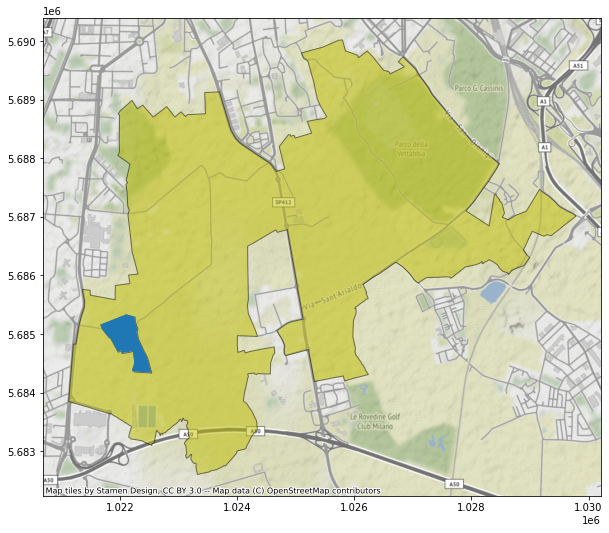

In [ ]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax = max.to_crs(epsg=3857).plot(facecolor='y',edgecolor='k',figsize=(10,10),alpha=0.5)
Minore.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [ ]:
affori = quartieri[quartieri.NIL == 'AFFORI']
affori

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."


In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [ ]:
Piste_Affori = piste[piste.intersects(affori.geometry.squeeze())]
Piste_Affori

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
32,9039,1088,VIALE ENRICO FERMI,None,urbana,percorso promiscuo - attraversamento,attraversamento,bidirezionale,attraversamento - generico,36.0,"LINESTRING (9.17915 45.51407, 9.17960 45.51413)"
252,9299,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,172.0,"LINESTRING (9.18299 45.50597, 9.18272 45.50617..."
255,9302,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,211.0,"LINESTRING (9.18176 45.50722, 9.18153 45.50742..."
294,9342,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,455.0,"LINESTRING (9.18045 45.50883, 9.18043 45.50890..."
668,9716,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,33.0,"LINESTRING (9.17925 45.51284, 9.17884 45.51277)"
...,...,...,...,...,...,...,...,...,...,...,...
2982,12754,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,8.0,"LINESTRING (9.17701 45.50897, 9.17706 45.50891)"
2983,12755,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,46.0,"LINESTRING (9.17675 45.50935, 9.17701 45.50897)"
2984,12756,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,20.0,"LINESTRING (9.17664 45.50951, 9.17675 45.50935)"
2985,12757,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,40.0,"LINESTRING (9.17641 45.50983, 9.17664 45.50951)"


In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

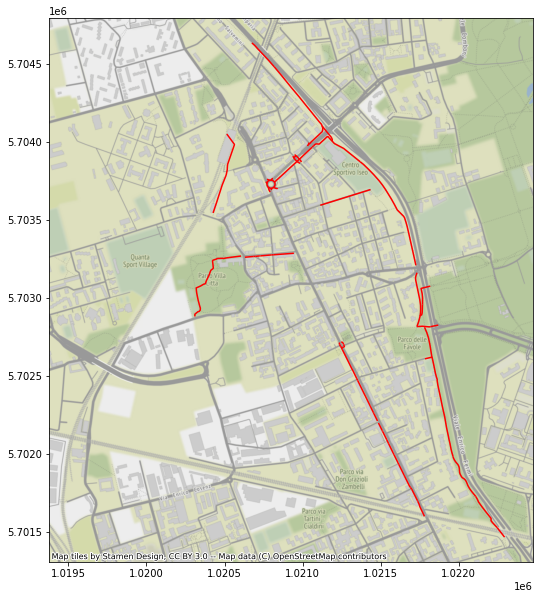

In [ ]:
ax = affori.to_crs(epsg=3857).plot(facecolor='none',figsize=(15,10))
Piste_Affori.to_crs(epsg=3857).plot(ax=ax,color='r')
ctx.add_basemap(ax)